<h1>Déterminez la hauteur d'un arbre à l'aide d'une régression</h1>

# 1. ,kzokedfz

## 1.1 Context

* version 0.0.1
* last update 2022-08-02
* Author Alexandre Gazagnes

## x.2 Imports

In [1]:
# !pip freeze

In [2]:
import os
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# import statsmodels

## x.x Graphics & options

In [3]:
sns.set()

warnings.filterwarnings('ignore')

## x.x Data

In [4]:
os.listdir()

['.ipynb_checkpoints', 'data', 'TP-page-6.ipynb']

In [5]:
path     = "data/source/"
filename = "les-arbres.csv"

In [6]:
os.listdir(path)

['les-arbres.csv']

In [7]:
df = pd.read_csv(path+filename, sep=";")
df.head(2)

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,233378,Arbre,Alignement,PARIS 20E ARRDT,157,NaN,RUE DE MENILMONTANT,001501004,Sophora,Sophora,japonica,NaN,65,6,Jeune (arbre)Adulte,NON,"48.8705897292168,2.398248222422003"
1,233865,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,BOULEVARD DE BERCY,000103002,Tilleul,Tilia,americana,''Nova'',55,5,Jeune (arbre)Adulte,NON,"48.83913076090666,2.376322566287728"


## x.x Columns cleaning

In [8]:
cols = df.columns
cols

Index(['IDBASE', 'TYPE EMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENT ADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLE FRANCAIS', 'GENRE', 'ESPECE', 'VARIETE OUCULTIVAR',
       'CIRCONFERENCE (cm)', 'HAUTEUR (m)', 'STADE DE DEVELOPPEMENT',
       'REMARQUABLE', 'geo_point_2d'],
      dtype='object')

In [9]:
cols = [i.lower() for i in cols]
cols = [i.split(" ")[0].strip() for i in cols]
cols

['idbase',
 'type',
 'domanialite',
 'arrondissement',
 'complement',
 'numero',
 'lieu',
 'idemplacement',
 'libelle',
 'genre',
 'espece',
 'variete',
 'circonference',
 'hauteur',
 'stade',
 'remarquable',
 'geo_point_2d']

In [10]:
df.columns = cols
df.head(2)

,idbase,type,domanialite,arrondissement,complement,numero,lieu,idemplacement,libelle,genre,espece,variete,circonference,hauteur,stade,remarquable,geo_point_2d
0,233378,Arbre,Alignement,PARIS 20E ARRDT,157,NaN,RUE DE MENILMONTANT,001501004,Sophora,Sophora,japonica,NaN,65,6,Jeune (arbre)Adulte,NON,"48.8705897292168,2.398248222422003"
1,233865,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,BOULEVARD DE BERCY,000103002,Tilleul,Tilia,americana,''Nova'',55,5,Jeune (arbre)Adulte,NON,"48.83913076090666,2.376322566287728"


# 2. First Tour

## 2.1 Display

In [11]:
df.head(5)

,idbase,type,domanialite,arrondissement,complement,numero,lieu,idemplacement,libelle,genre,espece,variete,circonference,hauteur,stade,remarquable,geo_point_2d
0,233378,Arbre,Alignement,PARIS 20E ARRDT,157,NaN,RUE DE MENILMONTANT,001501004,Sophora,Sophora,japonica,NaN,65,6,Jeune (arbre)Adulte,NON,"48.8705897292168,2.398248222422003"
1,233865,Arbre,Alignement,PARIS 12E ARRDT,NaN,NaN,BOULEVARD DE BERCY,000103002,Tilleul,Tilia,americana,''Nova'',55,5,Jeune (arbre)Adulte,NON,"48.83913076090666,2.376322566287728"
2,234757,Arbre,Alignement,PARIS 14E ARRDT,NaN,NaN,BOULEVARD RASPAIL,004103035,Tilleul,Tilia,x flavescens,''Glenleven'',80,10,Jeune (arbre)Adulte,NON,"48.835943243901234,2.332049269477685"
3,245018,Arbre,Alignement,PARIS 16E ARRDT,NaN,NaN,BOULEVARD LANNES,000701008,Platane,Platanus,x hispanica,NaN,180,15,Adulte,NON,"48.86388335089906,2.269408781698171"
4,107049,Arbre,Jardin,PARIS 7E ARRDT,Canton 04,NaN,JARDIN DU CHAMP DE MARS ET PELOUSES DE L ECOLE...,A00401020,Tilleul,Tilia,n. sp.,NaN,128,15,Adulte,NON,"48.85601688564015,2.29573613169062"


In [12]:
df.sample(10)

,idbase,type,domanialite,arrondissement,complement,numero,lieu,idemplacement,libelle,genre,espece,variete,circonference,hauteur,stade,remarquable,geo_point_2d
108386,159715,Arbre,CIMETIERE,HAUTS-DE-SEINE,NaN,NaN,CIMETIERE DE BAGNEUX / AVENUE DES COPALMES / D...,A04900024004,Copalme,Liquidambar,styraciflua,NaN,0,0,NaN,NaN,"48.809824279558086,2.308007614606597"
71732,249778,Arbre,Alignement,PARIS 15E ARRDT,36,NaN,BOULEVARD LEFEBVRE,000202020,Erable,Acer,platanoides,''Crimson King'',20,5,NaN,NON,"48.83108670817561,2.291567069440989"
185135,267767,Arbre,Alignement,PARIS 1ER ARRDT,NaN,NaN,PLACE DU MARCHE SAINT HONORE,000301003,Charme,Carpinus,betulus,''Fastigiata'',60,5,Adulte,NON,"48.867562076144964,2.331805014808812"
188818,146690,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,NaN,CIMETIERE DE PANTIN / AVENUE DES ERABLES POURP...,A05300204008,Erable,Acer,pseudoplatanus,''Atropurpureum'',0,0,NaN,NaN,"48.907540643538226,2.407041284446933"
195719,258652,Arbre,Alignement,PARIS 15E ARRDT,N°19 ter,NaN,RUE DES QUATRE FRERES PEIGNOT,000501009,Poirier à fleurs,Pyrus,calleryana,''Chanticleer'',35,6,Jeune (arbre)Adulte,NON,"48.84593518328761,2.282843884693502"
113982,217052,Arbre,Alignement,PARIS 12E ARRDT,2,NaN,RUE BECCARIA,000204001,Photinia,Photinia,x fraseri,''Red Robin'',35,5,Adulte,NON,"48.84624244629713,2.379347967058148"
28787,2027485,Arbre,PERIPHERIQUE,PARIS 17E ARRDT,NaN,NaN,TALUS N°20-01,092001001,Chêne,Quercus,cerris,NaN,35,4,Jeune (arbre),NON,"48.900331344528176,2.328114215435966"
137910,163080,Arbre,CIMETIERE,HAUTS-DE-SEINE,NaN,NaN,CIMETIERE DE BAGNEUX / AVENUE PRINCIPALE / DIV 21,A14000021010,Platane,Platanus,x hispanica,NaN,0,0,NaN,NON,"48.809025324745605,2.311347530536444"
179423,277301,Arbre,Alignement,PARIS 7E ARRDT,19,NaN,RUE D ESTREES,000501001,Noyer,Juglans,nigra,NaN,50,6,Jeune (arbre),NON,"48.85121302267016,2.309107331696517"
155390,120235,Arbre,Jardin,PARIS 18E ARRDT,NaN,NaN,SQUARE DE LA RUE HENRI HUCHARD / 25 RUE LOUIS ...,000103005,Prunus n. sp.,Prunus,n. sp.,NaN,20,3,Jeune (arbre),NON,"48.89930201199932,2.331300627225283"


In [13]:
df.tail(5)

,idbase,type,domanialite,arrondissement,complement,numero,lieu,idemplacement,libelle,genre,espece,variete,circonference,hauteur,stade,remarquable,geo_point_2d
205832,277196,Arbre,Alignement,PARIS 7E ARRDT,NaN,NaN,AVENUE EMILE POUVILLON,000402002,Platane,Platanus,occidentalis,NaN,180,25,Adulte,NON,"48.857501544418604,2.298694846390691"
205833,206780,Arbre,Alignement,PARIS 17E ARRDT,N°137,NaN,BOULEVARD MALESHERBES,002701007,Marronnier,Aesculus,x carnea,''Briotii'',24,5,Jeune (arbre),NON,"48.883629692582055,2.309000304779045"
205834,216387,Arbre,Alignement,PARIS 2E ARRDT,8,NaN,RUE NOTRE DAME DE BONNE NOUVELLE,000301001,Charme-Houblon,Ostrya,carpinifolia,NaN,40,5,Jeune (arbre)Adulte,NON,"48.87007536483951,2.349706549331126"
205835,218657,Arbre,Alignement,BOIS DE BOULOGNE,candélabre XVI-21140,NaN,AVENUE DE L HIPPODROME,000101008,Platane,Platanus,orientalis,NaN,161,16,Adulte,NON,"48.858427453525294,2.256386261184969"
205836,220705,Arbre,Alignement,PARIS 14E ARRDT,23,NaN,AVENUE RENE COTY,000401006,Platane,Platanus,x hispanica,NaN,180,15,Adulte,NON,"48.82939652307256,2.334305855478159"


## 2.2 Structure 

In [14]:
df.shape

(205837, 17)

In [15]:
df.dtypes

idbase              int64
type               object
domanialite        object
arrondissement     object
complement         object
numero            float64
lieu               object
idemplacement      object
libelle            object
genre              object
espece             object
variete            object
circonference       int64
hauteur             int64
stade              object
remarquable        object
geo_point_2d       object
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205837 entries, 0 to 205836
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   idbase          205837 non-null  int64  
 1   type            205837 non-null  object 
 2   domanialite     205837 non-null  object 
 3   arrondissement  205837 non-null  object 
 4   complement      49841 non-null   object 
 5   numero          0 non-null       float64
 6   lieu            205837 non-null  object 
 7   idemplacement   205837 non-null  object 
 8   libelle         204751 non-null  object 
 9   genre           205837 non-null  object 
 10  espece          203516 non-null  object 
 11  variete         38838 non-null   object 
 12  circonference   205837 non-null  int64  
 13  hauteur         205837 non-null  int64  
 14  stade           157711 non-null  object 
 15  remarquable     180946 non-null  object 
 16  geo_point_2d    205837 non-null  object 
dtypes: float64

In [17]:
df.dtypes.value_counts()

object     13
int64       3
float64     1
dtype: int64

In [18]:
df.nunique()

idbase            205837
type                   1
domanialite            9
arrondissement        25
complement          4516
numero                 0
lieu                7315
idemplacement      67295
libelle              196
genre                176
espece               548
variete              482
circonference        464
hauteur               40
stade                  4
remarquable            2
geo_point_2d      205829
dtype: int64

## 2.3 NaN & duplicated

In [19]:
df.isna().sum()

idbase                 0
type                   0
domanialite            0
arrondissement         0
complement        155996
numero            205837
lieu                   0
idemplacement          0
libelle             1086
genre                  0
espece              2321
variete           166999
circonference          0
hauteur                0
stade              48126
remarquable        24891
geo_point_2d           0
dtype: int64

In [20]:
df.isna().mean()

idbase            0.000000
type              0.000000
domanialite       0.000000
arrondissement    0.000000
complement        0.757862
numero            1.000000
lieu              0.000000
idemplacement     0.000000
libelle           0.005276
genre             0.000000
espece            0.011276
variete           0.811317
circonference     0.000000
hauteur           0.000000
stade             0.233806
remarquable       0.120926
geo_point_2d      0.000000
dtype: float64

In [21]:
tmp = df.isna().sum()
tmp[tmp>0]

complement     155996
numero         205837
libelle          1086
espece           2321
variete        166999
stade           48126
remarquable     24891
dtype: int64

In [22]:
df.duplicated().sum()

0

## 2.4 Data Inspection

In [23]:
df.describe()

,idbase,numero,circonference,hauteur
count,2.058370e+05,0.0,205837.000000,205837.000000
mean,4.729007e+05,NaN,81.168896,8.776658
std,6.435045e+05,NaN,92.006550,5.933078
min,9.987400e+04,NaN,0.000000,0.000000
25%,1.597500e+05,NaN,30.000000,5.000000
50%,2.282050e+05,NaN,70.000000,8.000000
75%,2.828810e+05,NaN,115.000000,12.000000
max,2.037785e+06,NaN,30553.000000,45.000000


In [24]:
df.describe(include="object")

,type,domanialite,arrondissement,complement,lieu,idemplacement,libelle,genre,espece,variete,stade,remarquable,geo_point_2d
count,205837,205837,205837,49841,205837,205837,204751,205837,203516,38838,157711,180946,205837
unique,1,9,25,4516,7315,67295,196,176,548,482,4,2,205829
top,Arbre,Alignement,PARIS 15E ARRDT,2,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,000101001,Platane,Platanus,x hispanica,''Baumannii'',Adulte,NON,"48.83853874307851,2.439349992164275"
freq,205837,106608,17312,741,2962,1866,42534,42571,36473,4695,77468,180770,2


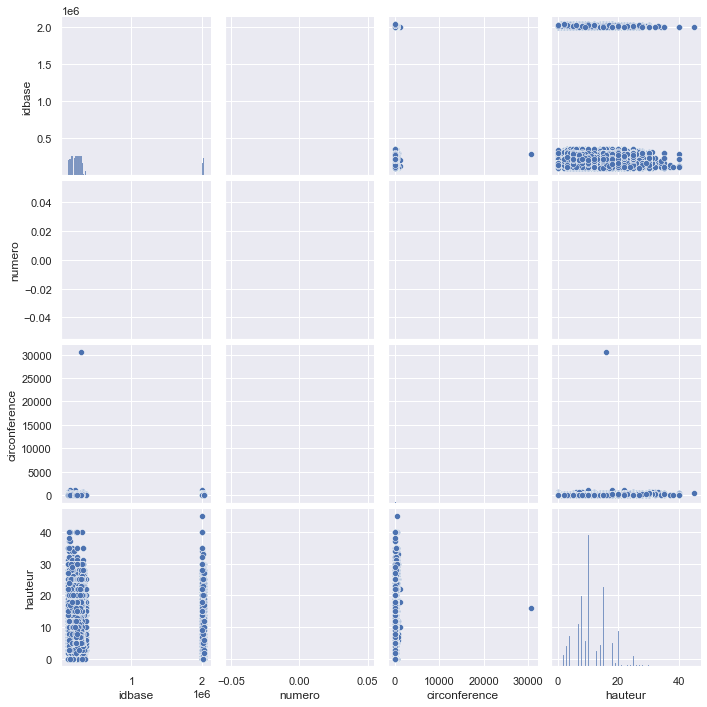

In [25]:
sns.pairplot(df)

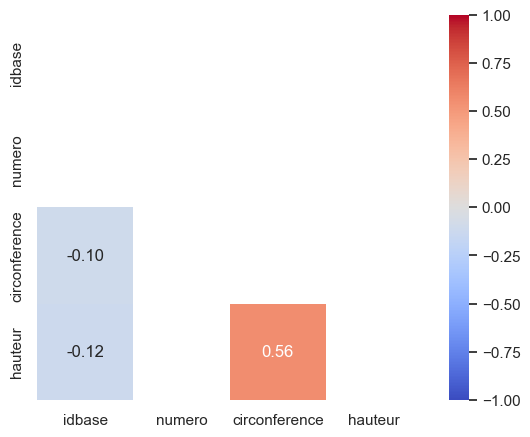

In [26]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, annot=True, fmt=".2f", cmap="coolwarm", square=True)

# 3. Cleaning

## 3.1 drop Nan

In [27]:
tmp = df.isna().mean().sort_values(ascending=False)
tmp

numero            1.000000
variete           0.811317
complement        0.757862
stade             0.233806
remarquable       0.120926
espece            0.011276
libelle           0.005276
hauteur           0.000000
circonference     0.000000
idbase            0.000000
genre             0.000000
type              0.000000
idemplacement     0.000000
lieu              0.000000
arrondissement    0.000000
domanialite       0.000000
geo_point_2d      0.000000
dtype: float64

In [28]:
tmp[tmp>0.5]

numero        1.000000
variete       0.811317
complement    0.757862
dtype: float64

In [29]:
tmp[tmp>0.5].index

Index(['numero', 'variete', 'complement'], dtype='object')

In [30]:
cols = tmp[tmp>0.5].index
df.drop(columns=cols, inplace=True)
df

,idbase,type,domanialite,arrondissement,lieu,idemplacement,libelle,genre,espece,circonference,hauteur,stade,remarquable,geo_point_2d
0,233378,Arbre,Alignement,PARIS 20E ARRDT,RUE DE MENILMONTANT,001501004,Sophora,Sophora,japonica,65,6,Jeune (arbre)Adulte,NON,"48.8705897292168,2.398248222422003"
1,233865,Arbre,Alignement,PARIS 12E ARRDT,BOULEVARD DE BERCY,000103002,Tilleul,Tilia,americana,55,5,Jeune (arbre)Adulte,NON,"48.83913076090666,2.376322566287728"
2,234757,Arbre,Alignement,PARIS 14E ARRDT,BOULEVARD RASPAIL,004103035,Tilleul,Tilia,x flavescens,80,10,Jeune (arbre)Adulte,NON,"48.835943243901234,2.332049269477685"
3,245018,Arbre,Alignement,PARIS 16E ARRDT,BOULEVARD LANNES,000701008,Platane,Platanus,x hispanica,180,15,Adulte,NON,"48.86388335089906,2.269408781698171"
4,107049,Arbre,Jardin,PARIS 7E ARRDT,JARDIN DU CHAMP DE MARS ET PELOUSES DE L ECOLE...,A00401020,Tilleul,Tilia,n. sp.,128,15,Adulte,NON,"48.85601688564015,2.29573613169062"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205832,277196,Arbre,Alignement,PARIS 7E ARRDT,AVENUE EMILE POUVILLON,000402002,Platane,Platanus,occidentalis,180,25,Adulte,NON,"48.857501544418604,2.298694846390691"
205833,206780,Arbre,Alignement,PARIS 17E ARRDT,BOULEVARD MALESHERBES,002701007,Marronnier,Aesculus,x carnea,24,5,Jeune (arbre),NON,"48.883629692582055,2.309000304779045"
205834,216387,Arbre,Alignement,PARIS 2E ARRDT,RUE NOTRE DAME DE BONNE NOUVELLE,000301001,Charme-Houblon,Ostrya,carpinifolia,40,5,Jeune (arbre)Adulte,NON,"48.87007536483951,2.349706549331126"
205835,218657,Arbre,Alignement,BOIS DE BOULOGNE,AVENUE DE L HIPPODROME,000101008,Platane,Platanus,orientalis,161,16,Adulte,NON,"48.858427453525294,2.256386261184969"


## x.x Keep only numeric cols

In [31]:
tmp = df.dtypes
tmp

idbase             int64
type              object
domanialite       object
arrondissement    object
lieu              object
idemplacement     object
libelle           object
genre             object
espece            object
circonference      int64
hauteur            int64
stade             object
remarquable       object
geo_point_2d      object
dtype: object

In [32]:
cols = ["circonference", "hauteur"]
df = df[cols]
df.head()

,circonference,hauteur
0,65,6
1,55,5
2,80,10
3,180,15
4,128,15


## 3.x Handle Outliers

In [33]:
df.describe()

,circonference,hauteur
count,205837.000000,205837.000000
mean,81.168896,8.776658
std,92.006550,5.933078
min,0.000000,0.000000
25%,30.000000,5.000000
50%,70.000000,8.000000
75%,115.000000,12.000000
max,30553.000000,45.000000


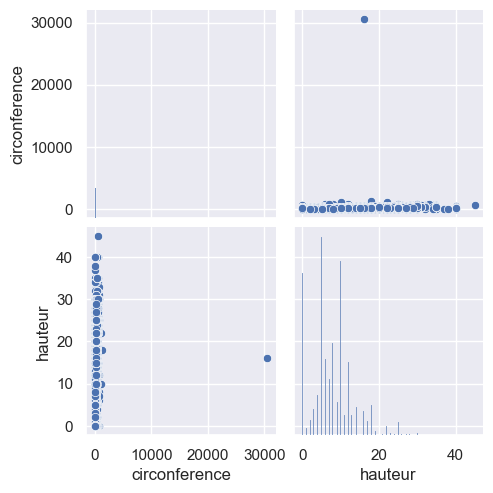

In [34]:
sns.pairplot(df)

<AxesSubplot:xlabel='circonference'>

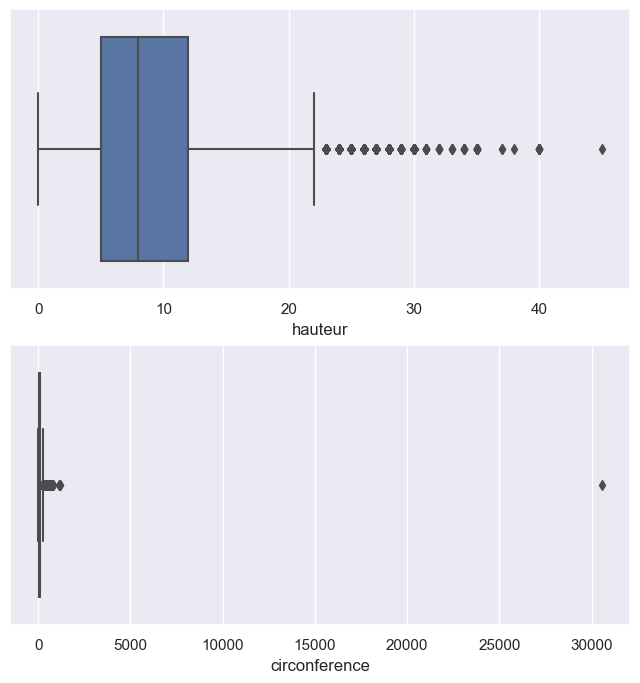

In [35]:
fig, axs = plt.subplots(2,1, figsize=(8,8))

sns.boxplot(df.hauteur, ax=axs[0], orient="v")
sns.boxplot(df.circonference, ax=axs[1], orient="v")

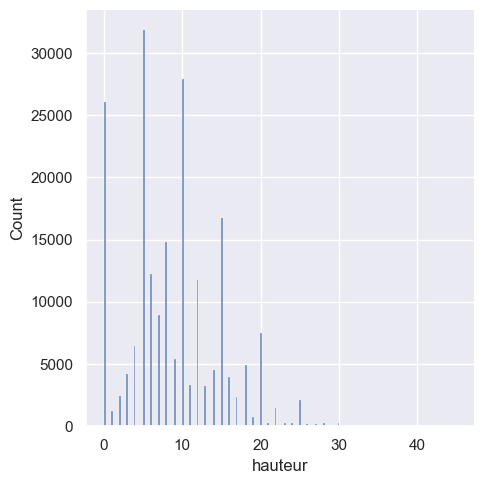

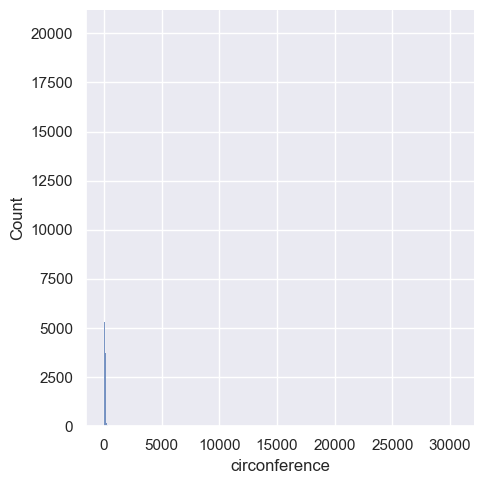

In [36]:
sns.displot(df.hauteur)
sns.displot(df.circonference)

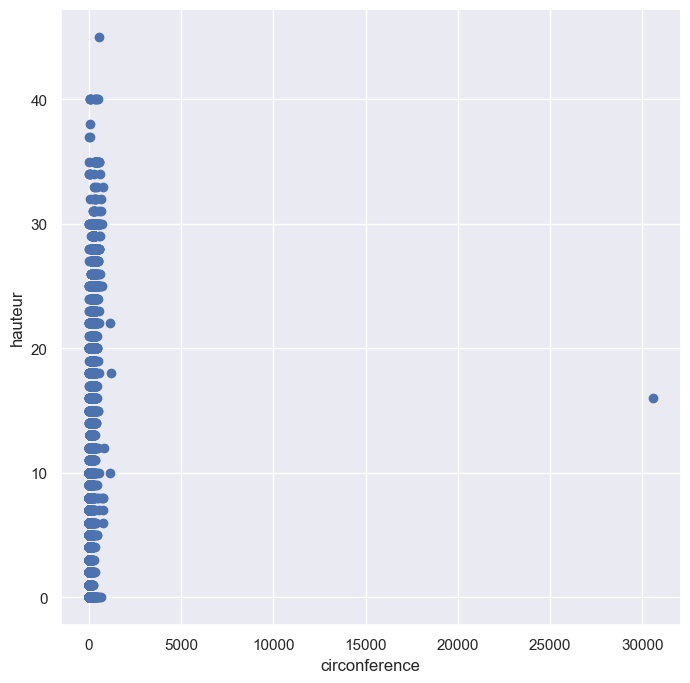

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")
_ = ax.scatter(df.circonference, df.hauteur)


In [38]:
df_cleaned = df.loc[df.circonference<5000]
df_cleaned.head()

,circonference,hauteur
0,65,6
1,55,5
2,80,10
3,180,15
4,128,15


<AxesSubplot:xlabel='circonference'>

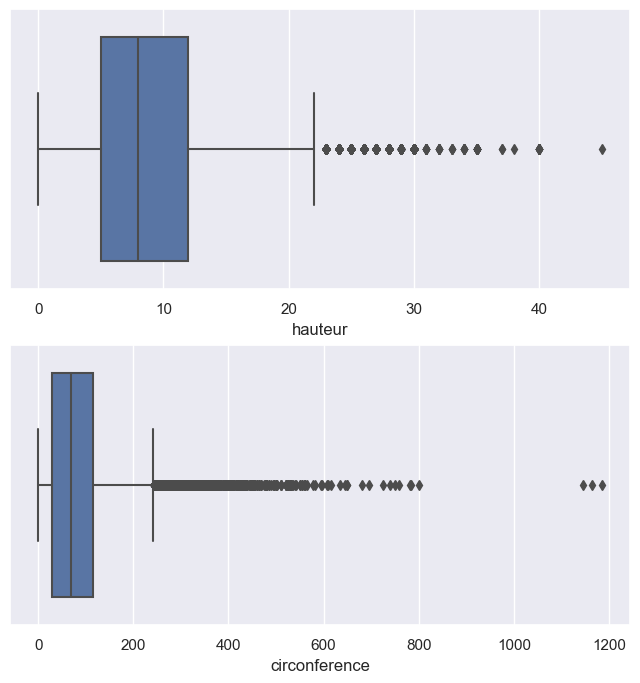

In [39]:
fig, axs = plt.subplots(2,1, figsize=(8,8))

sns.boxplot(df_cleaned.hauteur, ax=axs[0], orient="v")
sns.boxplot(df_cleaned.circonference, ax=axs[1], orient="v")

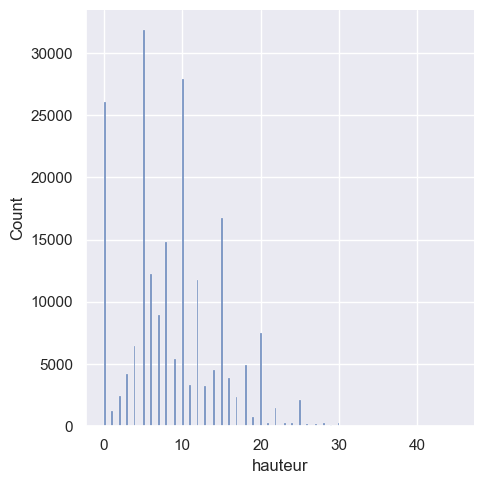

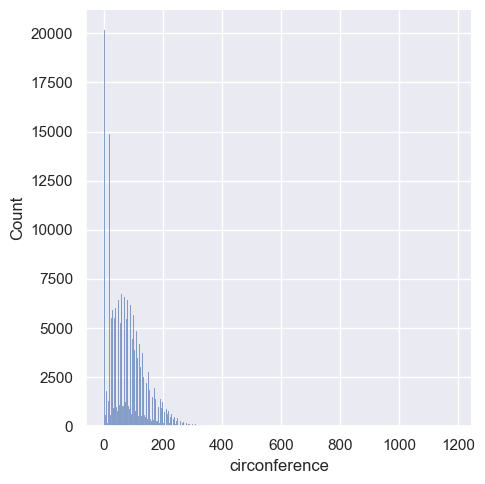

In [40]:
sns.displot(df_cleaned.hauteur)
sns.displot(df_cleaned.circonference)

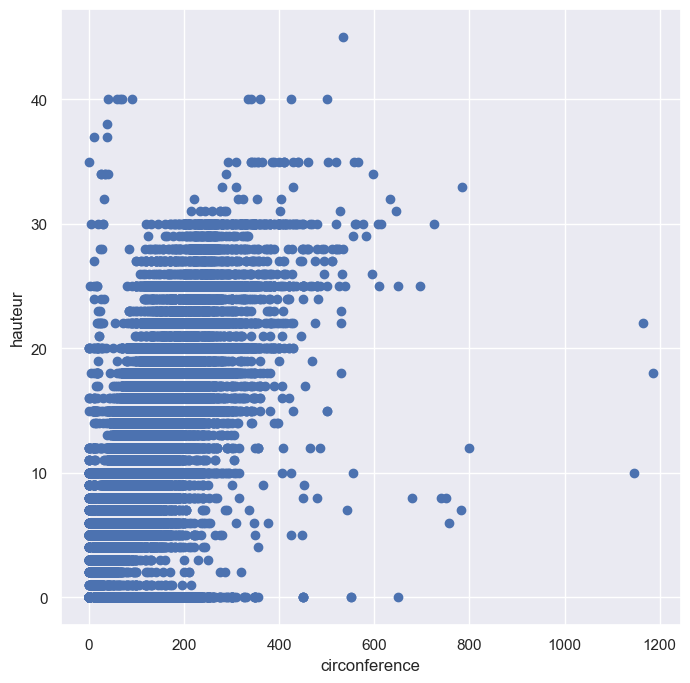

In [41]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")
_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur)

In [42]:
df_cleaned = df.loc[df.circonference<1000]
df_cleaned.head()

,circonference,hauteur
0,65,6
1,55,5
2,80,10
3,180,15
4,128,15


<AxesSubplot:xlabel='circonference'>

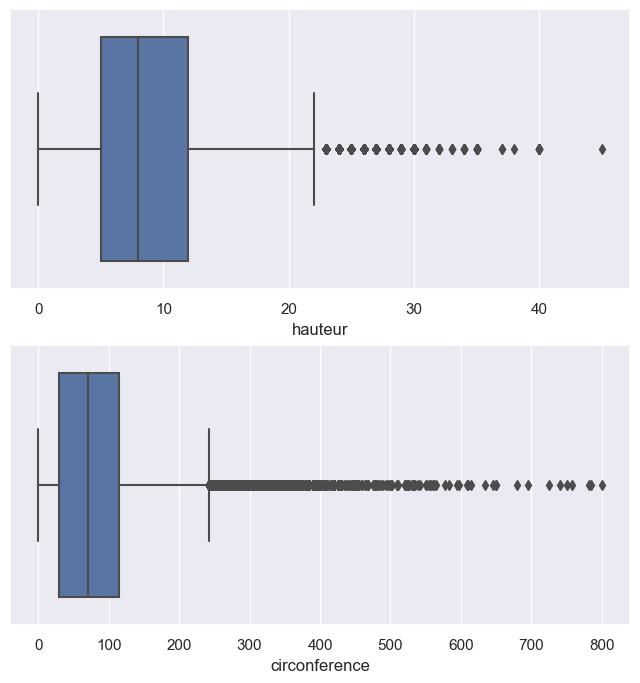

In [43]:
fig, axs = plt.subplots(2,1, figsize=(8,8))

sns.boxplot(df_cleaned.hauteur, ax=axs[0], orient="v")
sns.boxplot(df_cleaned.circonference, ax=axs[1], orient="v")

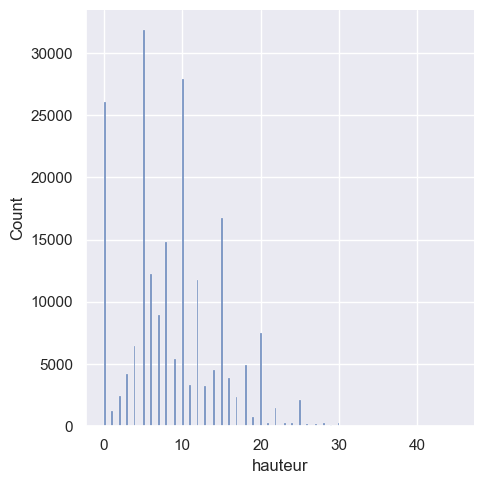

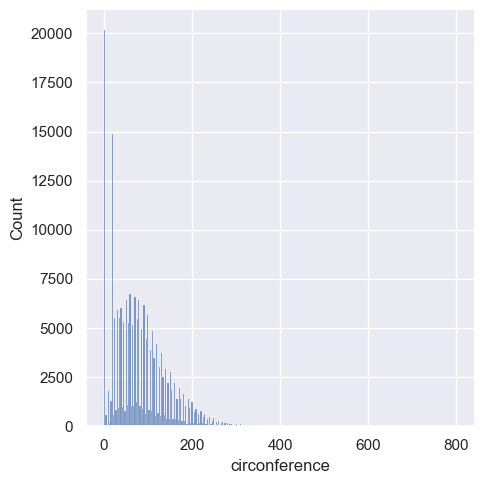

In [44]:
sns.displot(df_cleaned.hauteur)
sns.displot(df_cleaned.circonference)

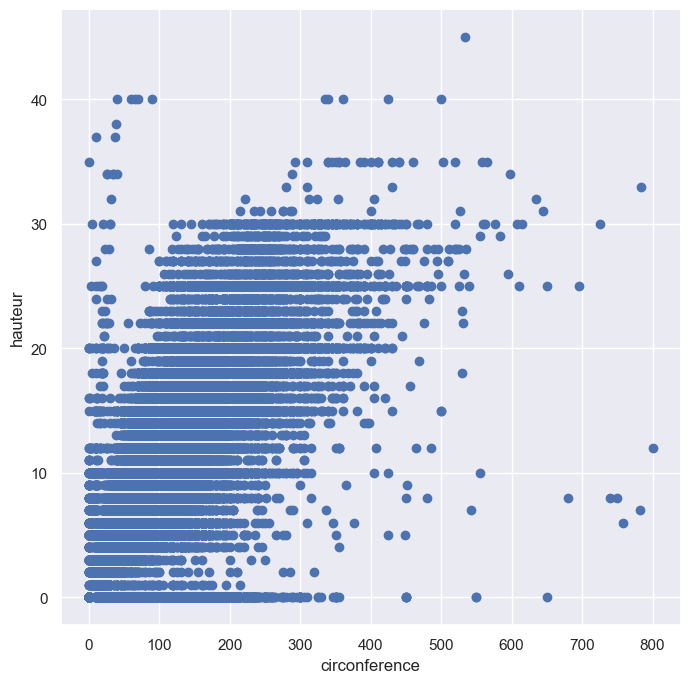

In [45]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")
_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur)

In [46]:
df_cleaned = df.loc[df.circonference<1000]
df_cleaned = df_cleaned.loc[df.circonference>0]
df_cleaned = df_cleaned.loc[df.hauteur>0]
df_cleaned.head()

,circonference,hauteur
0,65,6
1,55,5
2,80,10
3,180,15
4,128,15


<AxesSubplot:xlabel='circonference'>

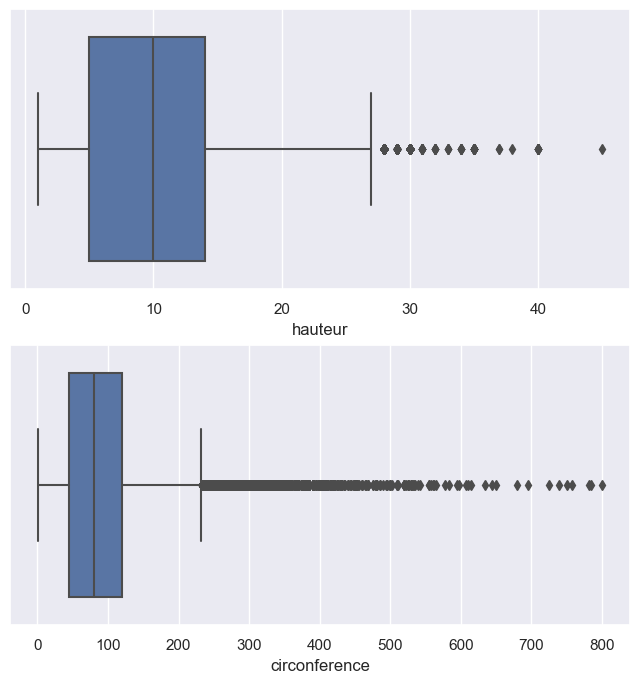

In [47]:
fig, axs = plt.subplots(2,1, figsize=(8,8))

sns.boxplot(df_cleaned.hauteur, ax=axs[0], orient="v")
sns.boxplot(df_cleaned.circonference, ax=axs[1], orient="v")

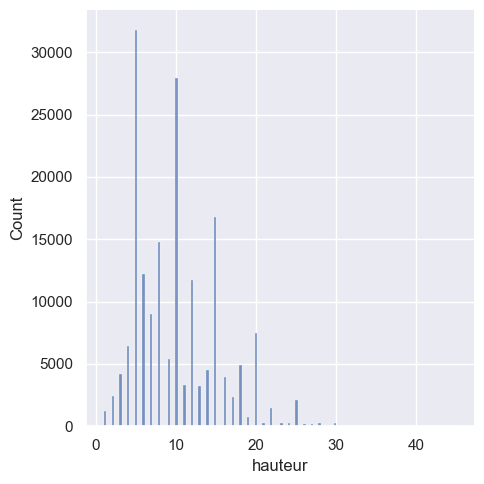

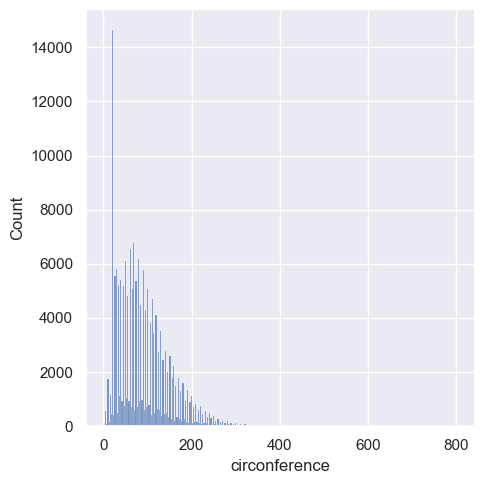

In [48]:
sns.displot(df_cleaned.hauteur)
sns.displot(df_cleaned.circonference)

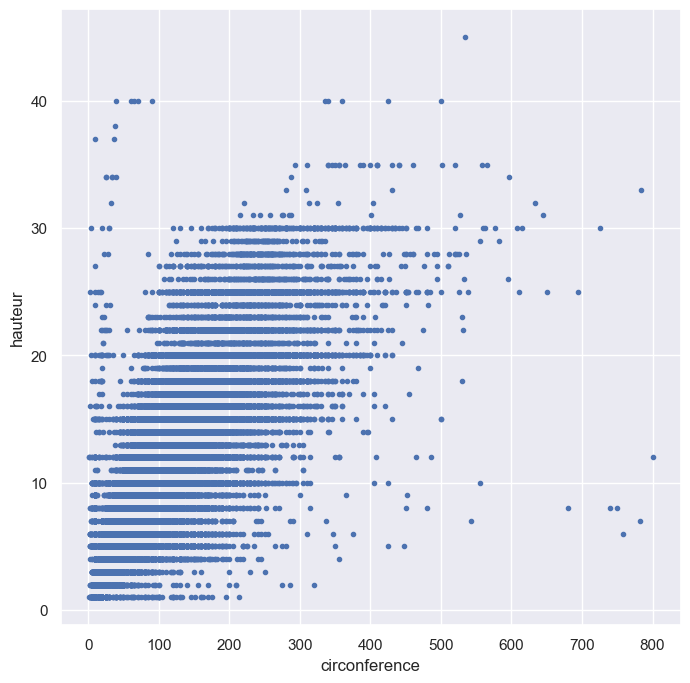

In [49]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")
_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur, marker=".")

Visualiser le nuage de points (graphique de dispersion de la hauteur en fonction de la circonférence).

Effectuer la régression linéaire de la hauteur en fonction de la circonférence.

Donner et interpréter le coefficient de détermination.

Analyser la significativité des paramètres (on teste la nullité des paramètres au niveau de test 5 %).



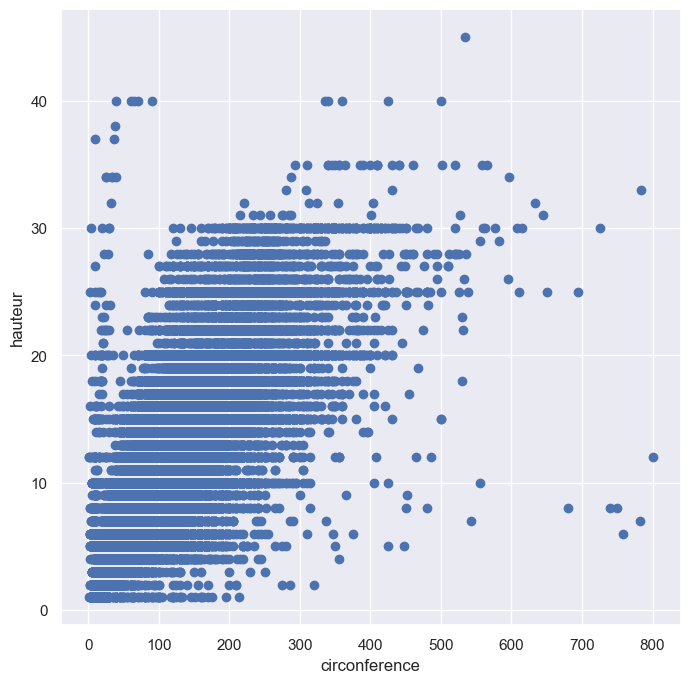

In [50]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")
_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur)

In [51]:
"""
df_cleaned = df.loc[df.circonference<150]
df_cleaned = df_cleaned.loc[df.circonference>0]
df_cleaned = df_cleaned.loc[df.hauteur>0]
df_cleaned.head()
"""

'\ndf_cleaned = df.loc[df.circonference<150]\ndf_cleaned = df_cleaned.loc[df.circonference>0]\ndf_cleaned = df_cleaned.loc[df.hauteur>0]\ndf_cleaned.head()\n'

In [52]:
"""
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")
_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur)
"""

'\nfig, ax = plt.subplots(1,1, figsize=(8,8))\nax.set_xlabel("circonference")\nax.set_ylabel("hauteur")\n_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur)\n'

# 4. modelisation

## 4.2 Linear Regression "classique"

In [77]:
df_cleaned.head()

,circonference,hauteur
0,65,6
1,55,5
2,80,10
3,180,15
4,128,15


In [78]:
y = df_cleaned.hauteur
X = df_cleaned.drop(columns="hauteur")

In [79]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [80]:
y_pred = lr.predict(X)

In [81]:
lr.score(X,y)

0.6857159058782032

In [82]:
r2_score(y, y_pred)

0.6857159058782032

In [83]:
a = lr.coef_
a

array([0.07248869])

In [84]:
a = a[0]
a

0.07248869166782736

In [85]:
b = lr.intercept_
b

3.544581006663072

In [86]:
# y = a * (x) + b


def my_prediction(x) : 
    return (a* x) + b


my_prediction = lambda x : (a* x) + b

In [87]:
X

,circonference
0,65
1,55
2,80
3,180
4,128
...,...
205832,180
205833,24
205834,40
205835,161


In [88]:
y_pred_2 = [my_prediction(x) for x in X.circonference.values]
y_pred_2

[8.256345965071851,
 7.531459048393577,
 9.34367634008926,
 16.592545506871996,
 12.823133540144973,
 15.142771673515448,
 4.631911381680482,
 10.793450173445809,
 14.055441298498039,
 8.618789423410988,
 13.692997840158903,
 6.4441286733761665,
 19.49209317358509,
 10.793450173445809,
 6.806572131715303,
 12.60566746514149,
 5.356798298358756,
 4.414445306677,
 20.216980090263366,
 16.592545506871996,
 4.994354840019619,
 10.43100671510667,
 15.505215131854587,
 12.96811092348063,
 4.269467923341345,
 13.692997840158903,
 8.981232881750124,
 19.49209317358509,
 12.96811092348063,
 4.994354840019619,
 10.068563256767533,
 12.243224006802354,
 13.620509148491074,
 7.024038206718785,
 10.068563256767533,
 16.592545506871996,
 13.330554381819766,
 7.893902506732713,
 4.994354840019619,
 8.981232881750124,
 11.373359706788428,
 19.129649715245954,
 8.618789423410988,
 5.356798298358756,
 11.518337090124081,
 7.893902506732713,
 14.417884756837175,
 5.356798298358756,
 12.96811092348063,
 1

In [89]:
y_pred

array([ 8.25634597,  7.53145905,  9.34367634, ...,  6.44412867,
       15.21526037, 16.59254551])

In [90]:
y_pred == y_pred_2

array([ True,  True,  True, ...,  True,  True,  True])

In [91]:
(y_pred == y_pred_2).all()

True

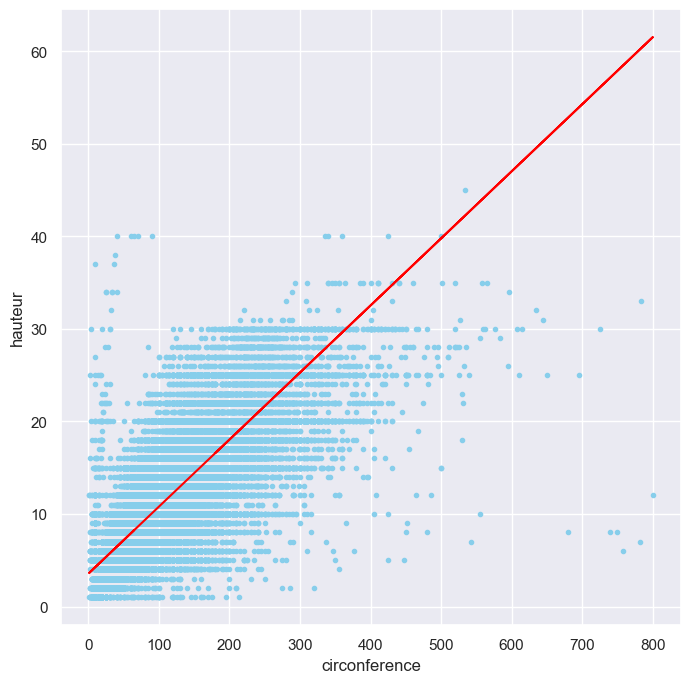

In [92]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_xlabel("circonference")
ax.set_ylabel("hauteur")

_ = ax.scatter(df_cleaned.circonference, df_cleaned.hauteur, c="skyblue", marker=".", alpha=1)
_ = ax.plot(df_cleaned.circonference, y_pred, c="red")



## 4.2 Regression Linéaire améliorée

In [95]:
df_cleaned.head()

,circonference,hauteur
0,65,6
1,55,5
2,80,10
3,180,15
4,128,15


In [96]:
df_cleaned["circonference_2"] = np.sqrt(df_cleaned.circonference)
df_cleaned.head()

,circonference,hauteur,circonference_2
0,65,6,8.062258
1,55,5,7.416198
2,80,10,8.944272
3,180,15,13.416408
4,128,15,11.313708


In [97]:
y = df_cleaned.hauteur
X = df_cleaned.drop(columns="hauteur")

In [98]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [99]:
lr.score(X,y)

0.7016859015695169

In [100]:
X = X.drop(columns="circonference")
X.head()

,circonference_2
0,8.062258
1,7.416198
2,8.944272
3,13.416408
4,11.313708


In [101]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X,y)

0.6991205422503327